# E6.6 Sourcing & Analyzing Time Series Data

### Step 2: Find a data set to work and import it into your Jupyter notebook. Ensure that this data somehow connects to the broader research topic for your Achievement project. The best data set would be one that shares a common key with your main data set, such as a geographic component, so you can merge the data, but this could be difficult to find, so it’s not a requirement.

**Answers:**  
  
Due to the difficulty in finding the available time series data reagarding heart disease, I decided to work on the income data (**Real Median Household Income in the U.S.: MEHOINUSA672N**) from Federal Reserve Economic Data. I would hypothesize that with the income increases, the living quality and the rate of doctor visits would increase accordingly, and therefore the heart diesase rate may decrease. Once I find the available heart disease time series data, I may confirm this hypothese in the future.

### Step 3 & 4:  
- Make a subset of your data set if necessary. Think about the historical domain of the series to decide if you need to (if there are irrelevant historical events in your data that would bias your analysis, for example). Also, make sure your set doesn’t include any forecasted data.  
  - In a markdown cell below the subset (if you make one), explain what logic you were following when selecting your data points.  
  - Remember that if you subset your data, you’ll need to reset the index, subset, then reset the “Date” column as your index in the new dataframe.  
- Create a line chart of your data.

In [1]:
# Import libraries
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import os
import warnings

warnings.filterwarnings("ignore") 
plt.style.use('fivethirtyeight') 

In [2]:
# Configure API key 
quandl.ApiConfig.api_key = 'eSwRgMQa3M_PoZw-kXw3'

In [3]:
# Importing the Federal Reserve Economic Data "Real Median Household Income in the U.S." variable.
data_income = quandl.get('FRED/MEHOINUSA672N')

In [4]:
data_income.head()

,Value
Date,
1984-01-01,53337.0
1985-01-01,54334.0
1986-01-01,56291.0
1987-01-01,56964.0
1988-01-01,57433.0


In [5]:
data_income.shape

(37, 1)

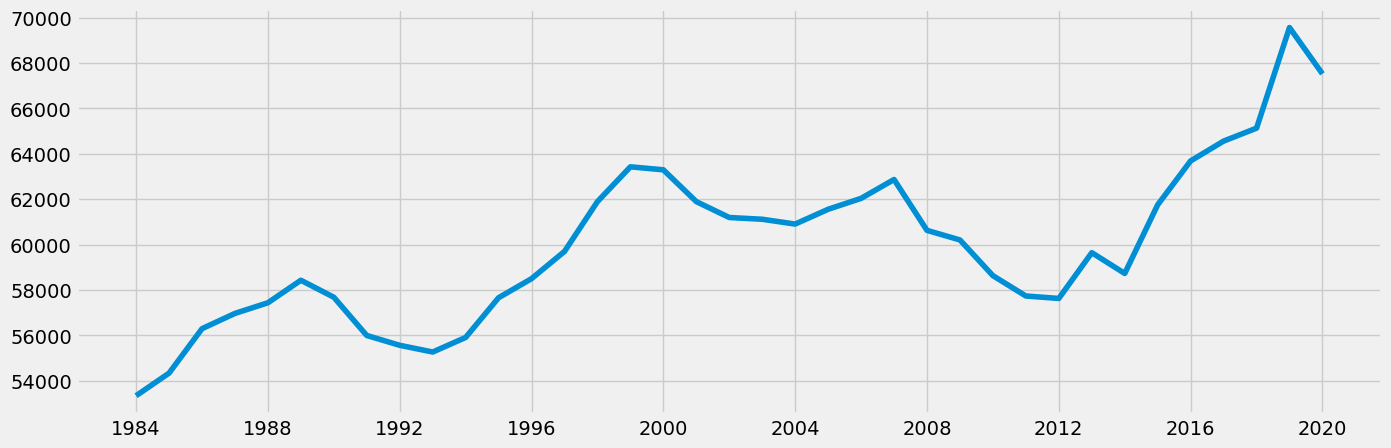

In [6]:
# Plot the dataframe using matplotlib.
plt.figure(figsize=(15,5), dpi=100) 
plt.plot(data_income)

In [7]:
# Check for missing values
data_income.isnull().sum() 

Value    0
dtype: int64

In [8]:
# Check for duplicates
dups = data_income.duplicated()
dups.sum()

0

**Answers:**  
- It is not necessary to make a subset of my data since the income data was from 1984 to 2020, which did **NOT** include any forecasted data or irrelevant historical events to bias my analysis.  
- Income data does **NOT** have any missing values or duplicates - it is ready for further analysis.

### Step 5: Decompose the data’s components.  
- Analyze the results from the plot in a markdown cell.

In [9]:
# Decompose the time series using an additive model
decomposition = sm.tsa.seasonal_decompose(data_income, model='additive')

In [10]:
# Define a fixed size for all special charts
from pylab import rcParams 
rcParams['figure.figsize'] = 18, 7

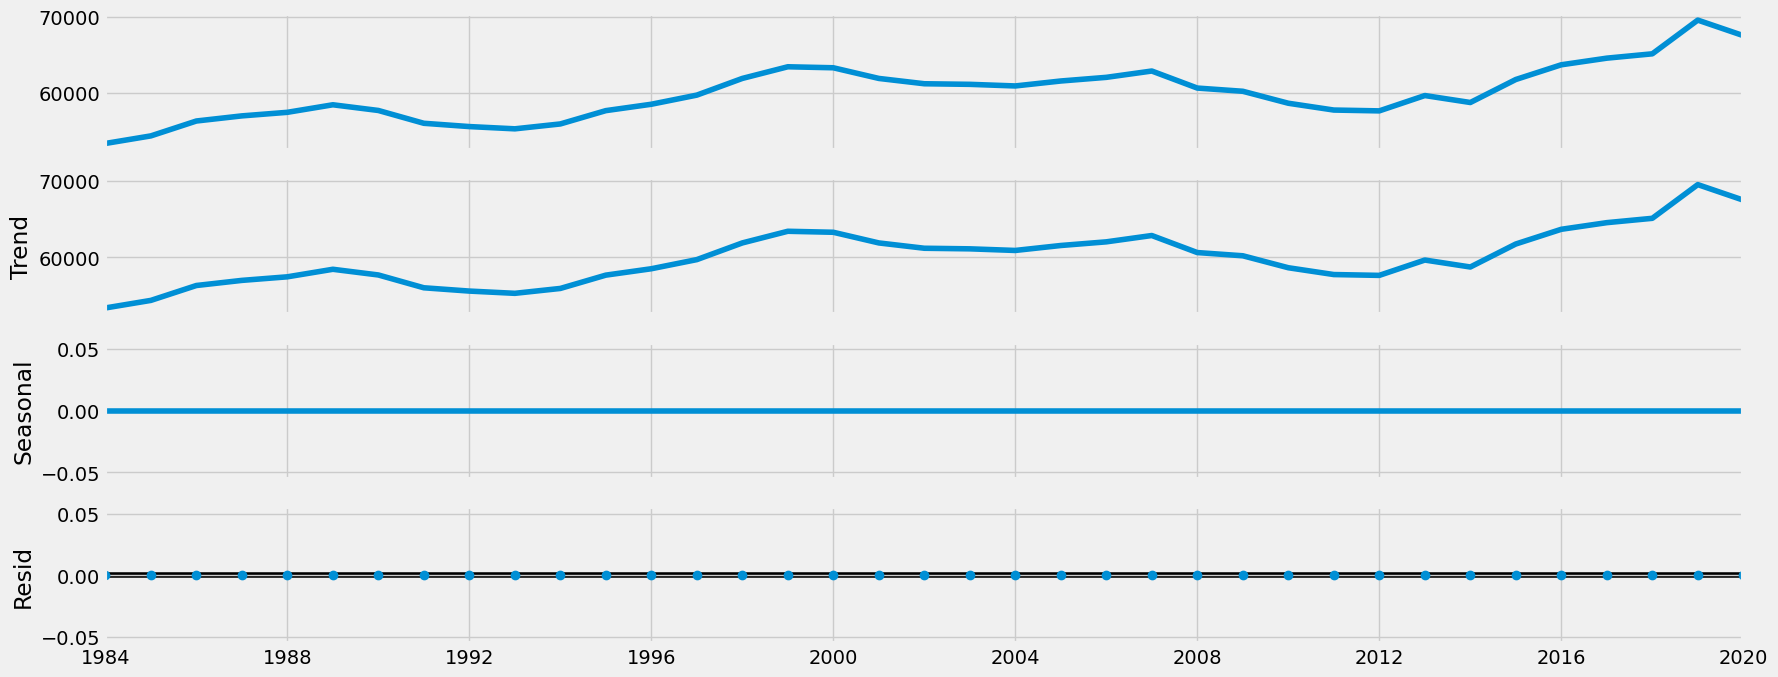

In [11]:
# Plot the separate components
decomposition.plot()
plt.show()

**Answers:**  
  
***Level & Trend:*** The level and trend (first and second charts) appear the same since the income data does not have much noise (it is smoothed data). The income had a drop in 1989, most probably due to start of the early 1990s recession and it gradually increased up to 2000. There was later on one jump around 2009, likely due to the global financial crisis.  
***Seasonality:*** Since the income data was represented annually, there was therefore no any seasonality being observed (seasonality refers to the pattern that repeats itself periodocally *at the same time each year*).  
***Residual:*** Similar to the seasonality, due to the data being represented annually, there was no extra data need to be extracted as residuals.

### Step 6: Conduct a Dickey-Fuller test to check for stationarity.  
- Interpret the results in a markdown cell and reference your null hypothesis.

In [12]:
# Import the adfuller() function
from statsmodels.tsa.stattools import adfuller

# Define the function and perform the Dickey-Fuller test:
def dickey_fuller(timeseries):
    
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(data_income['Value'])

Dickey-Fuller Stationarity test:
Test Statistic                 -1.066512
p-value                         0.728240
Number of Lags Used             7.000000
Number of Observations Used    29.000000
Critical Value (1%)            -3.679060
Critical Value (5%)            -2.967882
Critical Value (10%)           -2.623158
dtype: float64


**Answers:**  
  
P-value is larger than 0.05, I can **NOT** reject null hypothesis --> Data is **non-stationary**.

### Step 7: If your data isn’t stationary, conduct a round of differencing on it and repeat step 6.

In [13]:
# The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)
data_diff = data_income - data_income.shift(1) 

In [14]:
# In order to run the Dickey-Fuller test, remove the missing values that came about as a result of the differencing. 
data_diff.dropna(inplace = True) 

In [15]:
data_diff.head()

,Value
Date,
1985-01-01,997.0
1986-01-01,1957.0
1987-01-01,673.0
1988-01-01,469.0
1989-01-01,992.0


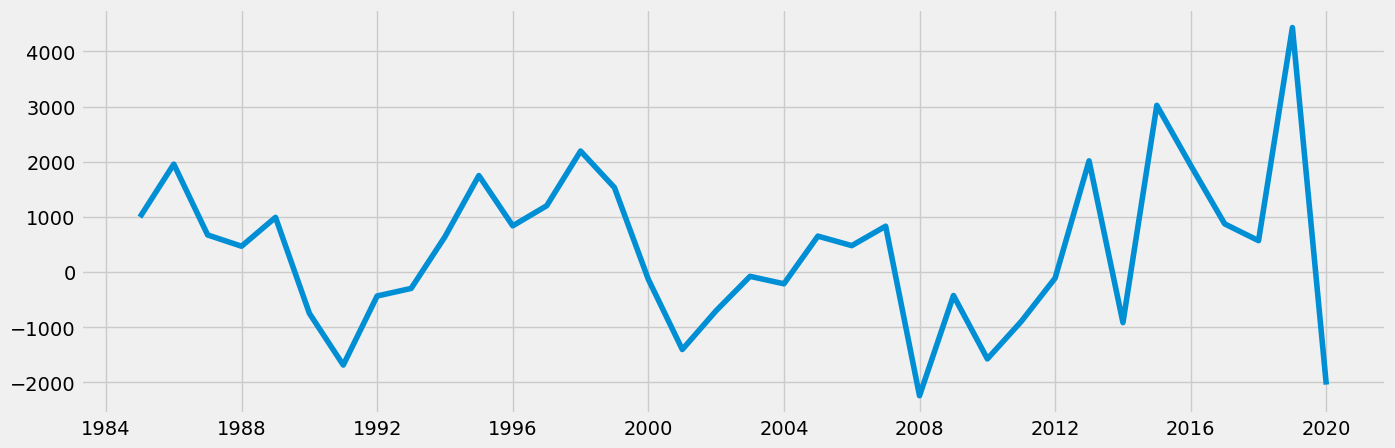

In [16]:
# Check out what the differencing did to the time-series curve
plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [17]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                 -2.293123
p-value                         0.174196
Number of Lags Used             6.000000
Number of Observations Used    29.000000
Critical Value (1%)            -3.679060
Critical Value (5%)            -2.967882
Critical Value (10%)           -2.623158
dtype: float64


**Observations:**  
  
P-value is still larger than 0.05, another round of differencing is needed.

### Step 8: If your data still isn’t stationary, perform another round of differencing and repeat step 6.

In [18]:
data_diff_2 = data_diff - data_diff.shift(1) 

In [19]:
data_diff_2.dropna(inplace = True) 

In [20]:
dickey_fuller(data_diff_2)

Dickey-Fuller Stationarity test:
Test Statistic                 -4.651639
p-value                         0.000104
Number of Lags Used             4.000000
Number of Observations Used    30.000000
Critical Value (1%)            -3.669920
Critical Value (5%)            -2.964071
Critical Value (10%)           -2.621171
dtype: float64


**Observations:**  
  
P-value is less than 0.05, it indicates the data is at the moment stationarized.

### Step 9: Check your data’s autocorrelations.

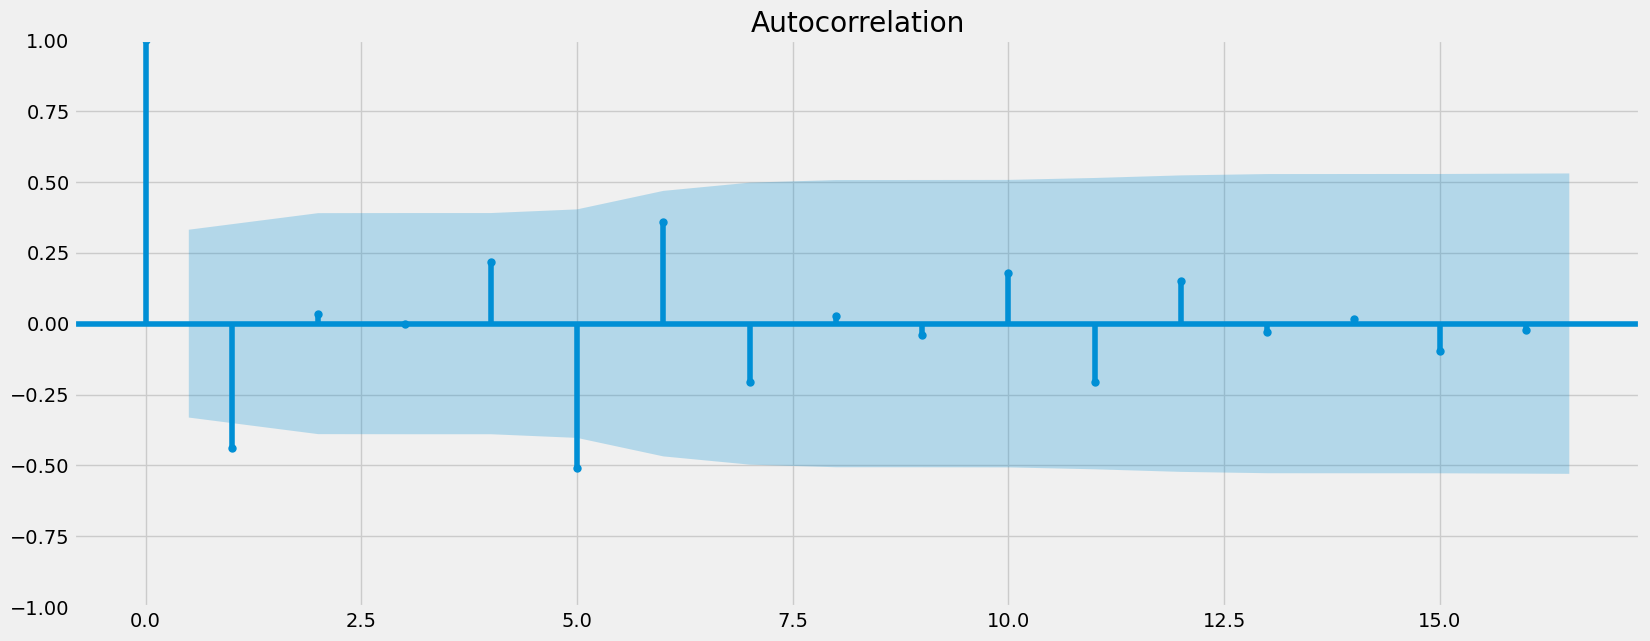

In [21]:
# Check out a plot of autocorrelations
# Import the autocorrelation and partial correlation plots
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 

plot_acf(data_diff_2)
plt.show()

**Observations:**  
  
Despite few lags beyond the confidence interval (blue area), income data now can be regarded as stationary.